# Gujarati Sentiment analysis
### Ensemble Learning : SVM + Random Forest + Logistic regression

***Installing and Importing Libraries***

In [ ]:
#Installing Libaraies

# Natural Language Toolkit (nltk), a popular Python library for text processing and natural language processing (NLP).
# Use : NLTK includes tools for tokenization, stemming, lemmatization, and stopword removal, which are essential for text preprocessing.
!pip install nltk

# Indic NLP Library, a toolkit designed for natural language processing tasks in Indian languages.
# Use : Gujarati sentiment analysis involves Gujarati text, and this library provides language-specific tools like tokenization and normalization for Indic languages.
!pip install indic-nlp-library

# scikit-learn (often abbreviated as sklearn) is a popular machine learning library in Python.
# Use : working with machine learning tasks, such as building predictive models, evaluating them, and performing tasks like classification (e.g., sentiment analysis), regression, clustering, etc.
# matplotlib is a widely used plotting library in Python, primarily for creating static, animated, and interactive visualizations.
# Use : for visualizing data, model performance, and metrics. Commonly used in data science and machine learning to understand and interpret the results visually.
!pip install scikit-learn matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 8.5 MB/s eta 0:00:00


In [ ]:
# Importing Libraries

# Pandas Library, a powerful Python tool for data manipulation and analysis
# Use : Pandas provides data structures like DataFrame and Series to handle structured data, making it easier to clean, preprocess, and analyze data.
import pandas as pd

# Random module, which provides methods to generate random numbers and make random selections.
# Use : Useful for shuffling datasets, creating random samples, or generating random data for testing.
import random

# Re module for regular expression (regex) operations.
# Use : To clean and preprocess text data by identifying and replacing patterns, such as removing special characters, URLs, or unnecessary whitespace.
import re

# Initializing nltk library into the program.
# Use : To access NLP functionalities like tokenization, stemming, and stopword removal.
import nltk

# Downloads the stopwords dataset from the NLTK library
# Use : Stopwords are common words (e.g., "is," "the," "and") that don’t contribute much meaning in text analysis. Removing these helps focus on more meaningful words for sentiment analysis.
nltk.download('stopwords')

# Imports the stopwords module from the nltk.corpus library.
# stopwords is a list of common words (such as "the", "is", "in", "at", etc.) that are typically removed from text during text processing because they don't add significant meaning or value for many natural language processing (NLP) tasks.
from nltk.corpus import stopwords

# Imports the word_tokenize function from the nltk.tokenize module.
# The word_tokenize function splits a given string of text into individual words or tokens. Tokenization is a crucial first step in many NLP tasks because it helps to break down text into manageable pieces (words, punctuation, etc.).
from nltk.tokenize import word_tokenize

# Download the 'punkt_tab' data
nltk.download('punkt_tab')
nltk.download('punkt')


# This imports the train_test_split function from sklearn.model_selection, which is used to split your dataset into training and testing sets.
from sklearn.model_selection import train_test_split

# This imports the TfidfVectorizer from sklearn.feature_extraction.text. TfidfVectorizer converts a collection of text documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features.
from sklearn.feature_extraction.text import TfidfVectorizer

# This imports several functions from sklearn.metrics: accuracy_score: Measures the percentage of correctly classified instances,
# classification_report: Provides a detailed performance report, including precision, recall, f1-score, and support for each class.
# confusion_matrix: Computes the confusion matrix, which shows the true positive, true negative, false positive, and false negative counts for classification tasks.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# This imports the LogisticRegression model from sklearn.linear_model. Logistic Regression is a popular classification algorithm that is used to predict binary or multiclass outcomes based on input features.
from sklearn.linear_model import LogisticRegression

# This imports the seaborn library and aliases it as sns. Seaborn is a Python data visualization library based on matplotlib.
import seaborn as sns

# This imports the pyplot module from the matplotlib library and aliases it as plt. matplotlib.pyplot provides a MATLAB-like interface for creating static, animated, and interactive visualizations.
import matplotlib.pyplot as plt

# Imports Python's built-in string module.
# Use : Provides common string operations and constants, like string.punctuation (which contains all punctuation characters). It's often used for text processing tasks such as removing punctuation, splitting text, and more.
import string

# Imports the word_tokenize function from the Natural Language Toolkit (NLTK) library.
# word_tokenize is a function that splits a text (usually a sentence or paragraph) into individual words or tokens. This is an essential part of text preprocessing.
# Especially in Natural Language Processing (NLP), as it converts a string of text into a list of words that can be further analyzed or processed.
from nltk.tokenize import word_tokenize

# To save the Machine learning model
# Use : joblib is a Python library commonly used for serializing (saving) and deserializing (loading) Python objects, especially large objects such as machine learning models. It can efficiently store models in binary format, allowing you to save and load them without needing to retrain them each time. For example, after training a machine learning model, you can save it with joblib.dump() and later load it with joblib.load().
import joblib

# Imports the Support Vector Classifier (SVC) from sklearn.svm.
# Use : SVC is used for classification tasks, where the goal is to find a hyperplane that best separates classes.
from sklearn.svm import SVC

# Imports the Random Forest Classifier from sklearn.ensemble.
# Use : A versatile classifier that uses multiple decision trees and aggregates their predictions for better accuracy and robustness.
from sklearn.ensemble import RandomForestClassifier

# Imports the Voting Classifier from sklearn.ensemble.
# Use : Combines the predictions of multiple classifiers (e.g., SVC, Random Forest and Logistic Regression) to improve performance by voting on the final output.
from sklearn.ensemble import VotingClassifier

# Used to access the WordCloud class, which is the core tool for generating and visualizing word clouds in Python.
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


***Dataset***

In [ ]:
# Gujarati text for each sentiment category

# A list of positive Gujarati sentences representing positive sentiment.
# Use : These sentences are sample data for the "positive" sentiment category in a Gujarati sentiment analysis dataset.
positive_texts = [
    "આ એક સારી વાત છે.", "મને આનંદ થાય છે.", "તમે બહુ સારું કર્યું.", "મને આ પસંદ આવ્યું.", "આ સૌથી ઉત્તમ છે.", "આ કાર્યને સરાહવા યોગ્ય છે.", "તમે અદ્ભુત કામ કર્યું.", "આનંદકારક રહેવું સારું છે.",
    "આ જીવનનો શ્રેષ્ઠ દિવસ છે.", "મને આમાંથી ઘણી પ્રેરણા મળી.", "મને તમારું સહકાર પસંદ આવ્યું.", "આ એક સુંદર અનુભવ હતો.", "આ ગુણવત્તા ખૂબ જ સારી છે.", "આજનો દિવસ ખરાબ નથી", "આ મહિનો ખરાબ નથી",
    "તે ખરાબ છોકરી નથી", "તે એક સારી છોકરી છે", "તે ખરાબ છોકરો નથી", "આ સોમવાર ખરાબ નથી", "આ અઠવાડિયું ખરાબ નથી", "આજનો દિવસ સારો છે.",
    "તમારો દયાળુ સ્વભાવ હંમેશા ઘણા લોકોને પ્રેરણા આપે છે.", "તમે ઇચ્છો તે બધું પ્રાપ્ત કરી શકો છો.", "આજે એક નવી શરૂઆત છે.", "તમારું હાસ્ય અને આનંદ અમૂલ્ય છે.", "તમારું મન સારા વિચારોથી ભરેલું છે.",
    "સકારાત્મક વિચારોથી ભવિષ્ય ઉજ્જવળ બને છે.", "દરેક દિવસ એક નવી તક છે.", "તમે આજે કંઈક મહાન કરી રહ્યા છો.", "તમે જે પણ કામ કરો છો તેમાં તમે શ્રેષ્ઠ છો.", "તમારું સ્મિત અને આનંદ અમૂલ્ય છે.",
    "તમે તમારી મહેનતથી બધું જ હાંસલ કરી શકશો.", "તમારી નાણાકીય અને માનસિક સુખાકારી મહત્વપૂર્ણ છે.", "તમારી ક્ષમતાઓમાં વિશ્વાસ રાખો.", "તમારું જીવન સુંદર અને આનંદમય છે.", "તમે જે બનવા માંગો છો તે બની શકો છો.",
    "તમારું વલણ સકારાત્મક છે.", "તમે કરેલા પ્રયત્નો સારા પરિણામ લાવશે.", "સખત મહેનત અને સમર્પણ શ્રેષ્ઠ પરિણામ આપે છે.", "તમારો સહકાર શ્રેષ્ઠ બાબત છે.", "તમે વધુ પ્રભાવશાળી બની રહ્યા છો.",
    "જ્યારે પણ તમને મદદની જરૂર હોય ત્યારે હું અહીં છું.", "તમારું રક્ષણાત્મક કવચ સૌથી મજબૂત છે.", "એક દિવસ તમારી મહેનતનું ફળ મળશે.","તમારું સ્મિત સમગ્ર વિશ્વને પ્રકાશિત કરે છે.", "તમને સકારાત્મક પ્રવૃત્તિઓમાં રસ છે.",
    "તમારું જીવન ખુશીઓથી ભરેલું છે.", "દરેક સમસ્યાનો ઉકેલ સકારાત્મક વિચારસરણીમાં રહેલો છે.", "તમને જે જોઈએ છે તે બધું નજીક છે.", "તમારો આત્મવિશ્વાસ તમને સશક્ત બનાવે છે.", "તમારું પરિવર્તન અને વૃદ્ધિ સ્પષ્ટ છે.",
    "તમે જીવનના તમામ પડકારોને પાર કરશો.", "તમારી મહેનત અને પ્રયત્નો ચોક્કસપણે પરિણામ આપશે.", "આજે તમારો શ્રેષ્ઠ દિવસ છે.", "તમે વિજેતા છો.", "તમારી ધીરજ અને નિશ્ચય પ્રેરણાદાયી છે.", "તમારા જીવનમાં તમારી વિશ્વસનીયતા મહત્વપૂર્ણ છે.",
    "તમારી આસપાસ રહેવું આનંદદાયક છે.", "તમે દરેક પરિસ્થિતિમાં શાંતિ જાળવી શકશો.", "તમારું લક્ષ્ય સ્પષ્ટ છે, અને તમે તેને પ્રાપ્ત કરશો.", "તમે શ્રેષ્ઠ છો, અને શ્રેષ્ઠ વસ્તુઓ તમારા જીવનમાં આવશે.", "તમારો ઉત્સાહ ચેપી છે.",
    "તમારું જે સ્વપ્ન છે તે ખૂબ જ સારી રીતે સાકાર થશે.", "તમારી પ્રેરણાદાયી દ્રષ્ટિ દરેકને પ્રેરણા આપે છે.", "તમારા માર્ગદર્શક બનવું એ આશીર્વાદ છે.", "તમે તમારા જીવનમાં મહાન ઉંચાઈઓ પર પહોંચી શકો છો.",
    "તમારું મન ઊંચું છે, અને તમારી અંદર અનંત શક્તિ છે.", "દરેક વ્યક્તિ તમારા સમર્થન માટે આભારી છે.", "તમારી વિશ્વસનીય દ્રષ્ટિ અન્ય લોકોને પ્રેરણા આપે છે.", "તમે નાના અવરોધોમાંથી જ્ઞાન મેળવી રહ્યા છો.",
    "તમારે આગળ વધવાની જરૂર છે તે બધું શક્ય છે.", "તમે જ્યાં પણ હોવ, હું તમારી સાથે છું.", "તમારું માન અને માનસિક શક્તિ ખૂબ જ મહત્વપૂર્ણ છે.", "તમારું જીવન એક અનોખી અને મહાન યાત્રા છે.", "તમે આજે સવારના આકાશની જેમ ચમકી રહ્યા છો.",
    "તમારું કામ શ્રેષ્ઠ છે.", "તમે શરૂ કરેલ કાર્ય સફળ થશે.", "તમારી દયા અન્ય લોકો માટે આશા અને પ્રકાશ છે.", "તમે શ્રેષ્ઠ છો, અને તમે હંમેશા આગળ વધશો.", "તમારો સકારાત્મક હેતુ અન્ય લોકોને પ્રેરણા આપે છે.", "તમારા પ્રયત્નો શ્રેષ્ઠ પરિણામો લાવશે.",
    "તમારી સાચી વિશ્વસનીયતા હંમેશા તમારી સાથે રહેશે.", "તમે જોશો, તમારી મહેનત ફળશે.", "તમારી પ્રેરણા વિશ્વને પસંદ આવશે.", "તમે ખરેખર શ્રેષ્ઠ છો અને તમારા પ્રયત્નોથી આગળ વધવાનું ચાલુ રાખશો.", "તમે મહેનત દ્વારા કાર્ય પૂર્ણ કરશો.",
    "તમારા નિશ્ચયને કારણે તમે દરેક લક્ષ્યને પ્રાપ્ત કરશો.", "તમારી પાસે અનંત શક્તિ છે.", "તમે જે પણ કામ કરશો તેમાં સફળતા મળશે.", "તમારું વલણ ભવિષ્ય માટે અનુકૂળ છે.", "તમે તમારી શ્રેષ્ઠતા બતાવશો.",
    "કૃતજ્ઞતા વ્યક્ત કરવાથી તમારા જીવનમાં વધુ સકારાત્મકતા આવે છે.", "દરેક સંકટમાં તમારો આત્મવિશ્વાસ અમૂલ્ય છે.", "તમે જીવનના દરેક અવરોધોને પાર કરી શકશો.", "તમારું સુલભ જ્ઞાન દરેકને પ્રેરણા આપે છે.", "તમારી દ્રષ્ટિ પ્રેરક છે.",
    "તમારી ખુશી અન્ય લોકો માટે પ્રેરણા છે.", "તમારું દયાળુ હૃદય સવારના સૂર્ય જેવું છે.", "દરેક કાર્યમાં શ્રેષ્ઠ પરિણામ મેળવવાનું તમારું નસીબ છે.", "તમે શ્રેષ્ઠ વિચારો છો, અને તમે શ્રેષ્ઠ પરિણામો મેળવો છો.",
    "શ્રેષ્ઠતા તરફ તમારી દ્રષ્ટિ અને માન્યતાઓ શક્તિશાળી છે.", "તમારી પ્રેરણા આત્મવિશ્વાસ સાથે છે.", "તમારું પ્લેટફોર્મ દરેક માટે માર્ગદર્શક પ્રકાશ છે.", "તમારી શ્રેષ્ઠતા ચમકતી રહે છે.", "તમારું હાસ્ય સકારાત્મક ઉર્જા આપે છે.", "તમારી કુદરતી દયા સૌમ્ય છે.",
    "તમે જે પણ કરો છો તેમાં તમે શ્રેષ્ઠ બની રહ્યા છો.", "તમારું જીવન આનંદ અને ખુશીઓથી ભરેલું છે.", "તમારી મહેનત, પ્રયાસ અને સમર્પણનું પરિણામ સારું આવશે.", "તમારો દયાળુ પરિચય લોકોને આશા આપે છે.",
    "તમારો સ્વભાવ હંમેશા આનંદ અને ખુશી આપે છે.", "તમારું ભવિષ્ય ઉજ્જવળ છે.", "તમારી મહેનત તમને આગળ લઈ જશે.", "તમારું જીવન વધુ આશાવાદી અને આનંદમય બની રહ્યું છે.", "તમારો હેતુ અન્ય લોકો માટે આશીર્વાદરૂપ છે.",
    "તમારું સકારાત્મક વલણ દરેક માટે આનંદદાયક છે.", "તમારી વિશ્વસનીય દ્રષ્ટિ દરેકને પ્રેરણા આપે છે.", "તમારો નિશ્ચય ગતિશીલ અને કાર્યક્ષમ છે.", "તમારું જીવન આનંદ અને પ્રેમથી ભરેલું છે.","તમારી શક્તિ અને શક્તિની દરેક વ્યક્તિ દ્વારા પ્રશંસા કરવામાં આવે છે.",
    "તમે જે પણ શરૂ કરશો તે સફળ થશે.","મારી જાતને સકારાત્મક લોકો અને અનુભવોથી ઘેરીને મને ભવિષ્ય માટે કૃતજ્ઞતા અને આશાવાદથી ભરી દે છે.",
    "મને મારી પ્રગતિ પર ગર્વ છે, અને હું આત્મવિશ્વાસ સાથે આગળ વધવાનું ચાલુ રાખતાં આ પ્રવાસ મને ક્યાં લઈ જાય છે તે જોવા માટે ઉત્સાહિત છું.",
    "જ્યારે મૂવીમાં થોડીક ખામીઓ હતી, તેમ છતાં તે ત્યાંની મોટા ભાગની ફિલ્મોની તુલનામાં શ્રેષ્ઠ કૃતિ હતી.",
    "મારી રીતે આવતી તકો માટે હું અતિશય આભારી અનુભવું છું, અને હું આગળના ભવિષ્ય વિશે ઉત્સાહિત છું.",
    "દરરોજ કંઈક નવું અને સુંદર લાવે છે, અને હું દરેક ક્ષણનો મહત્તમ ઉપયોગ કરવા માટે સંકલ્પબદ્ધ છું.",
    "મારા મિત્રો અને પરિવારનો ટેકો અને પ્રેમ દરેક પડકારનો સામનો કરવા માટે થોડો સરળ લાગે છે.",
    "આજે એક નવી શરૂઆત છે, અને હું દરેક ક્ષણને હકારાત્મકતા અને આશા સાથે સ્વીકારું છું.",
    "હું કેટલો આગળ આવ્યો છું તેના પર મને ગર્વ છે, અને હું જાણું છું કે હું જે પણ પગલું ભરું છું તે મને મારા લક્ષ્યોની નજીક લઈ જાય છે.",
    "આજે આભાર માનવા માટે ઘણું બધું છે અને હું મારા જીવનની સારી બાબતો પર ધ્યાન કેન્દ્રિત કરવાનું પસંદ કરી રહ્યો છું.",
    "હું અદ્ભુત લોકોથી ઘેરાયેલો છું જેઓ મને માનસિક રીતે ઉત્થાન આપે છે, અને તેઓ મારા જીવનમાં જે હકારાત્મક ઊર્જા લાવે છે તેના માટે હું આભારી છું.",
    "સૂર્ય ચમકે છે, હવા તાજી લાગે છે, અને મારી આસપાસની દરેક વસ્તુ જીવન કેટલું સુંદર હોઈ શકે છે તે અનુભવ અપાવે છે.",
    "હું દરરોજ નવી વસ્તુઓ શીખું છું, અને દરેક પસાર થતા ક્ષણ સાથે વધવા અને સુધારવા માટે તે ખૂબ લાભદાયી લાગે છે.",
    "આજે, હું કોઈપણ નકારાત્મકતાને છોડી દેવાનું પસંદ કરું છું અને મારી આસપાસના આનંદ અને સંભાવનાને સ્વીકારું છું.",
    "સારી વસ્તુઓ ક્ષિતિજ પર છે તે જાણીને, હું હકારાત્મક વલણ સાથે આગળના દિવસનો સામનો કરવા માટે ઉત્સાહિત છું.",
    "હું ઈચ્છું છું તે જીવન બનાવવાની મારી પાસે શક્તિ છે, અને આજે હું જે પણ નાની ક્રિયા કરું છું તે સાચી દિશામાં એક પગલું છે.",
    "દરેક નાની સિદ્ધિ, ભલે ગમે તેટલી નાની હોય, તે ઉજવણી કરવાનું અને હું કેટલો આગળ આવ્યો છું તેના પર ગર્વ કરવાનું કારણ છે.",
    "હું શાંતિ અને સંતોષની ભાવનાથી ભરપૂર છું, એ જાણીને કે હું મારા સપના તરફના સાચા માર્ગ પર છું.",
    "વિશ્વ તકોથી ભરેલું છે, અને હું ખુલ્લા દિલ અને દિમાગ સાથે મારી રીતે જે પણ આવે તેને સ્વીકારવા તૈયાર છું.",
    "આજે, હું જેના પર મને ખુશ કરે છે તેના પર ધ્યાન કેન્દ્રિત કરીશ, અને મને વિશ્વાસ છે કે હું જ્યાં પણ જઈશ ત્યાં સકારાત્મકતા મને અનુસરશે.",
    "હું જીવનની સરળ વસ્તુઓ માટે આભારી છું, જેમ કે સવારે ગરમ કોફીનો કપ અને મિત્ર તરફથી સ્મિત.",
    "દરેક નવો દિવસ વૃદ્ધિ અને સુધારણા માટેની તક છે, અને હું આજનો દિવસ હજુ સુધી શ્રેષ્ઠ બનાવવા માટે સંકલ્પબદ્ધ છું.",

]
#random.shuffle(positive_texts)

# Contain text expressing negative sentiment (e.g., dissatisfaction, frustration).
negative_texts = [
    "આ ખરાબ લાગ્યું.", "મને નિરાશા છે.", "તમે ખરાબ કર્યું.", "આ હકારાત્મક નથી.", "મને આ ન ગમ્યું.",
    "આવો અનુભવ ખરાબ છે.", "મને આ કામ ન ગમ્યું.", "આ મારી અપેક્ષા પર ખરો ન ઉતર્યું.", "તમે આને વધુ સારું કરી શકતા.",
    "આ નિરાશાજનક હતું.", "મને કોઈ સંતોષ ન મળ્યો.", "આ સમાધાનકારક નથી.", "આ દયનીય છે.", "આજનો દિવસ સારો નથી",
    "આ મહિનો સારો નથી", "તે સારી છોકરી નથી", "તે એક ખરાબ છોકરી છે", "તે સારો છોકરો નથી", "આ સોમવાર સારો નથી",
    "આ અઠવાડિયું સારું નથી", "આજનો દિવસ ખરાબ છે.",
    "હું હંમેશા મારા મિત્રો સાથે જૂઠું બોલું છું.", "તેને મસાલેદાર ખોરાક ખાવાનું પસંદ નથી.", "અમે આજે પાર્ટીમાં નથી જઈ રહ્યા.", "તેઓ આવતીકાલે મીટીંગમાં નહી આવી શકે.", "મેં એ ફિલ્મ હજી જોઈ નથી.", "તે સમજી શકતો નથી કે હું શું કહું છું.",
    "હું તમને આ સમસ્યામાં મદદ કરી શકતો નથી.", "તે રવિવારે કામ કરતી નથી.", "અમે ઇવેન્ટમાં હાજરી આપીશું નહીં.", "તે ક્યારેય કોઈનું સાંભળતો નથી.", "મને એકલા મુસાફરી કરવાની મજા નથી આવતી.", "તે લગ્નમાં નથી આવી રહી.",
    "તેઓ સમયસર કામ પૂરું કરી શકશે નહીં.", "મને નથી લાગતું કે તે પરીક્ષા પાસ કરશે.", "અમે હજુ સ્થળ નક્કી કર્યું નથી.", "તેની પાસે આ ક્ષેત્રમાં કોઈ અનુભવ નથી.", "મને એ શો જોવામાં રસ નથી.", "તેઓ ભગવાનમાં માનતા નથી",
    "અમે મીટિંગ દરમિયાન કોઈ ખલેલ પહોંચાડવા દઈશું નહીં.", "હું હંમેશા મહત્વપૂર્ણ તારીખો ભૂલી જાઉં છું.", "આજે મારી તબિયત સારી નથી.", "તે મારી સાથે વાત કરવા માંગતી નથી.", "અમે આજે મળી શકતા નથી.", "તેને કેવી રીતે વાહન ચલાવવું તે આવડતું નથી.",
    "તેઓ સેમિનારમાં ભાગ લેશે નહીં.", "મારી પાસે આ ખરીદવા માટે પૂરતા પૈસા નથી.", "તે ક્યારેય સવારે વહેલો ઉઠતો નથી.", "હું આજે બજારમાં નથી જતો.", "તેને પોતાની વસ્તુઓ બીજા સાથે શેર કરવાનું પસંદ નથી.", "તે હંમેશા મારા માતા-પિતાને ખોટું બોલે છે.",
    "મારી પાસે કાલે બગીચામાં જવાનો સમય નથી.", "તે આવતીકાલે બેઠકમાં ભાગ લેશે નહીં.", "મને ખબર નથી કે આ સમસ્યાને કેવી રીતે હલ કરવી.", "તેઓ પરિસ્થિતિને સમજી શકતા નથી.", "મને આજે રાત્રે બહાર જવામાં રસ નથી.", "તે માફી માંગવા તૈયાર નથી.",
    "પૂરતા પૈસા વિના અમે આ પ્રોજેક્ટ સાથે આગળ વધી શકતા નથી.", "મને હવે તેના પર વિશ્વાસ નથી.", "આ સ્થાન સૌથી ખરાબ છે.", "મને સવારે વહેલું જાગવું ગમતું નથી.", "તે ત્રણ ભાષા બોલી શકતો નથી.", "તેને ચા પીવાનું પસંદ નથી.",
    "અમે આ સપ્તાહના અંતે બીચ પર જઈ રહ્યા નથી.", "હું તમારા બહાના સાંભળવા માંગતો નથી.", "તેઓ તમને રૂમમાં પ્રવેશવા દેશે નહીં.", "તે સખત મહેનતમાં માનતો નથી.", "આજે મને કંઈ કરવાનું મન થતું નથી.", "તેણે જે કર્યું તેના માટે તેણી તેને માફ કરશે નહીં.",
    "મને સમજાતું નથી કે તેણે આવું કેમ કહ્યું.", "હું આવા વર્તનને સહન કરીશ નહીં.", "તેને મારા અભિપ્રાયની પરવા નથી.", "હું માની શકતો નથી કે આ થઈ રહ્યું છે.", "અમને અત્યારે કોઈ મદદની જરૂર નથી.", "તેને પ્લેનમાં મુસાફરી કરવાનું પસંદ નથી.",
    "હું મારી ચાવી શોધી શકતો નથી.", "તેઓ જાણતા નથી કે આ સમસ્યાને કેવી રીતે ઠીક કરવી.", "હું આ પરિસ્થિતિમાં આરામદાયક અનુભવતો નથી.", "તે ઓવરટાઇમ કામ કરવા માંગતો નથી.", "હું તમારી સાથે દલીલ કરવાનો નથી.",
    "મારી પાસે આજે ડૉક્ટર પાસે જવાનો સમય નથી.", "હું મારું વૉલેટ શોધી શકતો નથી.", "તેણી કેવી રીતે તરવું તે જાણતી નથી.", "અમે રજૂઆત માટે તૈયાર નથી.", "તેને સવારે વહેલું જાગવું ગમતું નથી.", "હું આ શહેરમાં ક્યારેય ગયો નથી.",
    "તેઓ આજે કામ કરવા માંગતા નથી.", "મને આ નોકરીમાં રસ નથી.", "તેને માંસ ખાવાનું પસંદ નથી.", "અમે સમયસર કામ પૂરું કરી શકતા નથી.", "મને નથી લાગતું કે તે આવશે.", "તેઓ સ્પર્ધામાં ભાગ લેતા નથી.", "મારી પાસે વીકએન્ડ માટે કોઈ પ્લાન નથી.",
    "હું ખરેખર અસંબંધિત થયેલો અને એકલો અનુભવું છું, અને જ્યારે હું ખૂબ જ ભરાઈ ગયો હોઉં ત્યારે મદદ માટે પહોંચવાની શક્તિ મેળવવી મુશ્કેલ છે.",
    "દરરોજ એક યુદ્ધ જેવું લાગે છે, અને હું ફક્ત તેમાંથી પસાર થવાનો પ્રયાસ કરી રહ્યો છું, પરંતુ તે તે જ સમયે કંટાળાજનક અને નિરાશાજનક છે.",
    "હું નિરાશા પછી નિરાશાનો સામનો કરું છું, અને હું આશ્ચર્ય પામી રહ્યો છું કે શું હું ક્યારેય બ્રેક પકડીશ કે કોઈ વાસ્તવિક પ્રગતિ જોઈશ.",
    "તે ક્યારેય મારી સલાહ સાંભળતો નથી.", "હું માનતો નથી કે તેણે નમ્રતાથી કહ્યું.", "અમે ત્યાં જવા માંગતા નથી.", "તેઓ અહીં રહેવા માંગતા નથી.", "આવું સુંદર સ્થળ મેં ક્યારેય જોયું નથી.", "તે કાર ચલાવી શકતો નથી.", "અમે આજે રાત્રે કોન્સર્ટમાં જઈ શકતા નથી.",
    "મને આ ખોરાક ગમતો નથી.", "તે બહુ બોલતી નથી.", "અમને અત્યારે વધુ મદદની જરૂર નથી.", "તેણીને રસોઇ કેવી રીતે કરવી તે આવડતું નથી.", "મારી પાસે આ પ્રવાસ માટે પૂરતા પૈસા નથી.", "તેઓ પાર્ટીમાં આવતા નથી.", "હું ભૂત-પ્રેતમાં માનતો નથી.",
    "તે હંમેશા ગુસ્સામાં રહે છે.", "હું આ વિષયથી પરિચિત નથી.", "તેઓ મારી વિનંતી સ્વીકારી રહ્યા નથી.", "હું શું કહું છું તે તેને સમજાતું નથી.", "મને હવે તેના પર વિશ્વાસ નથી.", "અમને વહેલા જવાની મંજૂરી નથી.", "હું શોધી રહ્યો હતો તે પુસ્તિકા મને મળી નથી.",
    "તેમની પાસે ખાલી સમય નથી.", "હું જૂથમાં જોડાવા માંગતો નથી.", "તેને રમત રમવામાં રસ નથી.", "વરસાદ પડી રહ્યો હોવાથી અમે બહાર જઈ શકતા નથી.", "તેને પુસ્તકો વાંચવામાં રસ નથી.", "મને નથી લાગતું કે આજે આપણે આ કાર્ય પૂર્ણ કરી શકીશું.",
    "તેણીને અત્યારે બહાર જવાનું મન થતું નથી.",
    "હું વિશ્વાસ કરી શકતો નથી કે આ નવું ઉત્પાદન કેટલું 'અદ્ભુત' છે, તે ચોક્કસપણે મારી અપેક્ષા મુજબ નથી.",
    "હું તાજેતરમાં ખૂબ જ ભરાઈ ગયો છું, બધું એકસાથે ભેગા થઈ ગયું છે, અને મને ખાતરી નથી કે તે બધું કેવી રીતે મેનેજ કરવું.",
    "ભલે હું ગમે તેટલો સખત પ્રયાસ કરું, એવું લાગે છે કે વસ્તુઓ ખોટી થઈ રહી છે, અને જ્યારે કંઈપણ યોજના મુજબ ન થાય ત્યારે આશાવાદી રહેવું મુશ્કેલ છે.",
    "હું આજે સવારે ભારે હૃદય સાથે જાગી ગયો છું, મારા જીવનમાં સતત તણાવ અને અનિશ્ચિતતાથી થાકી ગયો છું.",
    "એવું લાગે છે કે હું જે પગલું ભરું છું તે બે ડગલાં પાછળ છે, અને પ્રેરિત રહેવું વધુ મુશ્કેલ બની રહ્યું છે.",
    "હું અત્યારે ખૂબ જ હતાશ છું કારણ કે હું ગમે તેટલા પ્રયત્નો કરું તો પણ મને લાગે છે કે મને કંઈ જ મળતું નથી.",
    "તે એક રફ અઠવાડિયું રહ્યું છે, અને હું એ લાગણીને દૂર કરી શકતો નથી કે વસ્તુઓ ગમે ત્યારે જલ્દીથી સુધરશે નહીં.",
    "હું એક પછી એક આંચકાનો સામનો કરી રહ્યો છું, અને જ્યારે એવું લાગે છે કે બધું જ તૂટી રહ્યું છે ત્યારે આશાવાદી રહેવું મુશ્કેલ છે.",
    "હું માનસિક અને ભાવનાત્મક રીતે ખૂબ જ નિષ્ક્રિય અનુભવું છું, અને ભલે હું શું કરું, મને વધુ સારું અનુભવવાનો કોઈ રસ્તો મળી શકતો નથી.",
    "હું જેટલો વધુ વસ્તુઓને ઠીક કરવાનો પ્રયાસ કરું છું, તે વધુ ખરાબ થવા લાગે છે, અને હું વિશ્વાસ ગુમાવવાનું શરૂ કરું છું કે કંઈપણ ક્યારેય સારું થશે.",
    "મારા ખભા પર સતત વજન છે, અને હું એ લાગણીને હલાવી શકતો નથી કે અહીંથી વસ્તુઓ ફક્ત મુશ્કેલ બનશે.",
    "હું નિરાશા પછી નિરાશાનો સામનો કરીને થાકી ગયો છું; જ્યારે એવું લાગે કે કશું બદલાતું નથી ત્યારે આગળ વધવું ચાલુ રાખવું મુશ્કેલ છે.",
    "હું અત્યારે ખૂબ જ અટવાયેલો અનુભવું છું, જેમ કે હું નિરાશા અને નકારાત્મકતાના ક્યારેય સમાપ્ત ન થનારા ચક્રમાં ફસાઈ ગયો છું જેમાંથી હું બહાર નીકળી શકતો નથી.",
    "હું તાજેતરમાં ખૂબ જ તણાવનો સામનો કરી રહ્યો છું, અને એવું લાગે છે કે તે મારા સ્વાસ્થ્ય અને સુખકારી પર અસર કરવાનું શરૂ કરી રહ્યું છે.",
    "ભલે હું સકારાત્મક રહેવાનો કેટલો પ્રયત્ન કરું, જ્યારે મારી આસપાસની દરેક વસ્તુ તૂટી રહી હોય તેવું લાગે ત્યારે તે મુશ્કેલ છે.",
    "હું પ્રેરિત રહેવા માટે સંઘર્ષ કરી રહ્યો છું કારણ કે એવું લાગે છે કે ભલે હું ગમે તેટલી મહેનત કરું, કંઈપણ ક્યારેય વળતર આપતું નથી.",
    "તે થોડા મુશ્કેલ દિવસો રહ્યા છે, અને હું મદદ કરી શકતો નથી પરંતુ મને લાગે છે કે કંઈપણ ક્યારેય સુધરવાનું નથી, પછી ભલે હું ગમે તે કરું.",
    "મને લાગે છે કે મારી પાસે વિકલ્પો અને શક્તિ ખતમ થઈ ગઈ છે, અને હું ગમે તેટલો પ્રયત્ન ચાલુ રાખવાનો પ્રયત્ન કરું, આશાવાદી રહેવું મુશ્કેલ થઈ રહ્યું છે."
]
#random.shuffle(negative_texts)

# Contain text expressing neutral sentiment, where no strong positive or negative emotion is conveyed.
neutral_texts = [
    "આ એક સામાન્ય દિવસ છે.", "મને ફર્ક નથી પડતો.", "આ કેળવણી છે.", "કોઈ ખાસ નથી.", "આ સમાન છે.",
    "આ સામાન્ય વાત છે.", "મારે આ મુદ્દા પર કંઈક કહેવું નથી.", "આ એક સામાન્ય પ્રશ્ન છે.", "આ વાતનો કોઈ ખાસ મતલબ નથી.",
    "કોઈ વિશેષ નથી.", "હું તટસ્થ છું.", "આ એક નિત્યનો કાર્ય છે.", "મારે કોઈ મત નથી.", "આજે સોમવાર છે", "આજે મંગળવાર છે",
    "આજે બુધવાર છે", "આજે ગુરુવાર છે", "આજે શુક્રવાર છે", "આજે શનિવાર છે", "આજે રવિવાર છે", "આજે નવા મહિનાની શરૂઆત થઈ રહી છે.",
    "મને આજે બપોરે થોડા કલાકો આરામ કરવાનો મોકો મળ્યો, અને હવે હું સાંજની તૈયારી કરી રહ્યો છું, કંઈ ખાસ આયોજન નથી.",
    "મેં નોંધ્યું કે મારા ફોનમાં સોફ્ટવેર અપડેટ ઉપલબ્ધ છે, તેથી મેં આગળ વધવાનું નક્કી કર્યું અને જ્યારે મારી પાસે એક ક્ષણ હોય ત્યારે તેને ઇન્સ્ટોલ કરવાનું નક્કી કર્યું.",
    "મેં આ અઠવાડિયે શું કરવાની જરૂર છે તેની યાદી બનાવી છે; તે જબરજસ્ત નથી, પરંતુ ટોચ પર રહેવા માટે કેટલીક વસ્તુઓ છે.",
    "હું આજે બપોરે ફરવા ગયો હતો, અને જ્યારે તે ખાસ કરીને ઉત્તેજક ન હતું, ત્યારે બહાર નીકળવાનો અને માન સાફ કરવાનો તે એક સરસ રસ્તો હતો.",
    "મારી મિત્ર સાથે કેટલીક આગામી ઘટનાઓ વિશે વાતચીત થઈ હતી, અને તે ઉપરાંત, રાહ જોવી અને વસ્તુઓ કેવી રીતે પ્રગટ થાય છે તે જોવાનું વધુ સારું છે.",
    "મેં આજે એક નવી શ્રેણીના કેટલાક એપિસોડ જોયા; તે રસપ્રદ છે, પરંતુ અત્યાર સુધી કંઈ ખૂબ રોમાંચક નથી.",
    "મેં સમાચારો જાણવામાં થોડો સમય પસાર કર્યો, અને જ્યારે ત્યાં ઘણું બધું થઈ રહ્યું છે, ત્યારે એવું લાગતું નથી કે કંઈપણ માટે તાત્કાલિક પગલાંની જરૂર છે.",
    "હું સપ્તાહાંતની આતુરતાથી રાહ જોઈ રહ્યો છું, જોકે મારી પાસે કોઈ મોટી યોજનાઓ નથી - તે મોટે ભાગે આરામ કરવાની અને નાના કાર્યોની સંભાળ લેવાની તક છે.",
    "હું મારી ટૂ-ડૂ સૂચિમાંથી ધીમે ધીમે પરંતુ ચોક્કસથી પસાર થઈ રહ્યો છું; હજી પણ થોડુંક હલ કરવાનું બાકી છે, પરંતુ હું સતત પ્રગતિ કરી રહ્યો છું.",
    "આજે કામ પર એક સામાન્ય દિવસ હતો, મીટિંગ્સ અને નિયમિત કાર્યો સાથે; તે ખાસ રોમાંચક ન હતું, પરંતુ તે મુશ્કેલ પણ ન હતું.",
    "મેં એક પુસ્તકના થોડા પ્રકરણો વાંચ્યા જે હું સમાપ્ત કરવાનો હતો, અને જ્યારે તે સૌથી આકર્ષક વાંચન નથી, તે મારી એકાગ્રતા બનાવિ રાખે છે.",
    "હું આજે સવારે ઊઠ્યો હતો.", "તે ઓફિસમાં ગઈ હતી.", "આ દિવસ ખૂબ સામાન્ય રહ્યો.", "હું કફી પી રહ્યો હતો.", "તે શહેરમાં રહે છે.",
    "મારે આજે સાઇટ વિઝિટ પર જવાનું હતું.", "તમે કઈ કસોટી પર આધાર રાખો છો?", "હું દવાખાને ગયો હતો.", "તે નિષ્પક્ષ અને તટસ્થ પત્રકાર બનવાનો પ્રયત્ન કરે છે", "તે કંઈક વાંચી રહી હતી.",
    "આ કામ સાત વાગે શરૂ થયું હતું.", "હું કંઈક વિચારતો હતો.", "તે દરરોજ મીટિંગમાં જાય છે.", "આજે હું ઘરે રહી રહ્યો છું.", "તે એક સુંદર શહેર છે.",
    "હું સ્ટેશન પર હતો.", "તે એક રેસ્ટોરેન્ટમાં જઇ રહી હતી.", "હું પુસ્તકો વાંચતો હતો. ", "તે આ ટેક્નોલોજી વિશે વધુ જાણવા માંગે છે.", "હું બજારમાં ગયો હતો.",
    "આ દિવસ ગરમ હતો.", "આજે મારે થોડો આરામ કરવો છે.", "તે હવે ઘરે આવી છે.", "હું થોડા દિવસોથી અહીં રહું છું.", "તે એક શોપિંગ મોલમાં હતી.",
    "હું થોડું પાણી પી રહ્યો હતો.", "તે ગુરુવારથી વિદેશ જવાના છે.", "હું કૉફી શોપમાં બેઠો હતો.", "નાની કોફી શોપ બજારના ખૂણે આવેલી છે.", "હું થોડીવાર પછી વાત કરું.",
    "તે આજે ત્યાં નહીં આવી.", "આજે હું ત્યાં જવાનો હતો.", "હું આ મકાનમાં એક રાત્રિ રહ્યો હતો.", "તે બધા કામ સમાપ્ત કર્યા છે.", "તે એક મ્યુઝિયમમાં હતી.",
    "હું એક પોસાય તેવી રીતે ખોરાક લઈ રહ્યો હતો.", "તે દરરોજ સવારે તાજા ફળો ખાય છે.", "આ એક સામાન્ય મકાન છે.", "અમે એક સામાન્ય દિવસ પસાર કર્યો.", "હું ક્યાંક જવાનો હતો.",
    "તે તેના દોસ્તો સાથે બેઠો હતો.", "આ સેતુ બહુ જૂનો છે.", "હું હમણાં થોડું કામ કરી રહ્યો છું.", "તે મ્યુઝિક સાંભળતી હતી.", "આ કામ પૂરું થાય છે.",
    "જો મને કંઈક અસામાન્ય લાગે તો મને વાંધો નથી.", "તે પોતાની જાતને જોઈ રહી છે.", "તે દર સોમવારે સવારે પ્રાર્થના કરે છે.", "ત્યારે હું શાંતિથી સૂતો હતો.", "તે ગમે ત્યારે ઘરમાં રહી શકે છે.",
    "આનાથી થોડો બદલાવ આવશે.", "હું અહીં મળવા આવ્યો છું.", "તે આ મુદ્દા પર ધ્યાન કેન્દ્રિત કરી રહ્યો છે.", "હું નવી રીતે કામ કરી રહ્યો છું.", "તે હવે જાદુ શીખી રહ્યો છે.",
    "હું આજે અહીં આરામ કરું છું.", "તે થોડા દિવસોમાં નવો કોર્સ શરૂ કરશે", "તે ઘરની બહાર ગયો.", "આજે, હું આરામ કરવાનું ચાલુ રાખીશ.", "તે હાલમાં કંઈક વાંચી રહી છે.",
    "હું ઘરે જાઉં છું.", "હું આજે બીમાર રહેવાનો હતો.", "તે આજે રમી રહ્યો હતો.", "હું ક્યાંક જઈ રહ્યો હતો.", "તે હવે બહાર જવાનો છે.",
    "આજે હવામાન ન તો ખૂબ ગરમ છે કે ન તો ખૂબ ઠંડુ, બસ... સંપૂર્ણ સરેરાશ.",
    "હું એક નવી ફિલ્મ જોઈ રહ્યો છું.", "આજે, મારે કેટલાક નક્કર જ્ઞાનની જરૂર છે.", "હું આ પરિસ્થિતિ સ્વીકારું છું.", "તે હવે ઘરના કેટલાક કામોમાં વ્યસ્ત છે.", "હું કંઈક પર કામ કરી રહ્યો છું.",
    "તે આજના નકામા કલાકોનો ઉપયોગ કરી રહ્યો છે.", "હું પણ તને મળવા તૈયાર છું.", "તમે ક્યારે પાછા જાવ છો?", "હું આખરે વાત કરું છું.", "હું હમણાં જ વિરામ લઈ રહ્યો છું.",
    "હું થોડો આરામ કરવા જાઉં છું.", "હું શાંતિથી કામ કરી રહ્યો છું.", "તે ખૂબ જ ઠંડા વાતાવરણમાં સક્રિય છે.", "આજે હું શાંતિથી રહું છું.", "આજે, હું ખૂબ વ્યસ્ત છું.",
    "તે સૌથી જૂના સ્મારક પર જવાની તૈયારી કરી રહ્યો છે.", "હું જલ્દી પાછો આવીશ.", "તે મારા માટે યોગ્ય પસંદગી નથી.", "આ મકાન સુંદર છે.", "હું મારી જાતે વાંચું છું.",
    "તે આજે ઘરની અંદર છે.", "આ વસ્તી ધરાવતો વિસ્તાર છે.", "હું થોડીવાર મૌન રહ્યો.", "તે અન્ય લોકો સાથે વાત કરી રહ્યો છે.", "હું મોટે ભાગે સારું જોઉં છું.",
    "તે રોજ શાળાએ જતી.", "આજે, મારે કેટલાક મૂલ્યવાન કામ કરવાની જરૂર છે.", "હું હવે જમવા જાઉં છું.", "તે આગળ વધી રહ્યો છે.", "આજે, હું ફક્ત આરામ કરું છું.",
    "હવે, હું જાઉં છું.", "હું તેની સાથે વાત કરતો હતો.", "હું ચુપચાપ જવાનું વિચારી રહ્યો હતો.", "હું તમને થોડા સમય પછી મળીશ.", "હું સારા સમયની રાહ જોઈ રહ્યો છું.",
    "મારી પાસે આજે કેટલાક કાર્યો છે, તેથી હું તેમને એક પછી એક પૂર્ણ કરવા પર ધ્યાન કેન્દ્રિત કરીશ અને જોઉં છું કે હું કેટલું પરિપૂર્ણ કરી શકું છું.",
    "હું અગાઉ એક સાથીદાર સાથે વાત કરી રહ્યો હતો, અને અમે બંને સંમત થયા કે વસ્તુઓ આગળ વધી રહી છે, પરંતુ હજુ ઘણું કરવાનું બાકી છે.",
    "આજે હવામાન ખૂબ ગરમ કે ખૂબ ઠંડુ નથી, તેથી મારી દિનચર્યામાં જવા માટે તે આરામદાયક તાપમાન છે.",
    "મેં બપોરનો સમય કેટલાક પ્રોજેક્ટ્સ પર કામ કરવામાં વિતાવ્યો, અને જ્યારે મેં બધું પૂરું કર્યું ન હતું, ત્યારે મેં થોડી પ્રગતિ કરી.",
    "મેં આજે સવારે મારું ઇમેઇલ ચેક કર્યું, અને ત્યાં કેટલાક મહત્વપૂર્ણ સંદેશા હતા કે જેને આજે પછીથી અનુસરવાની જરૂર છે.",
    "હું પછીથી કરિયાણાની દુકાનમાં અમુક મૂળભૂત પુરવઠો લેવા જાઉં છું, સામાન્ય સિવાય કંઈ નથી.",
    "આજે કામ પર નિયમિત મીટિંગ હતી; અમે ચાલુ પ્રોજેક્ટ્સની ચર્ચા કરી અને આગામી સપ્તાહ માટે કેટલીક સમયમર્યાદા નક્કી કરી.",
    "આ સવારનો સફર બહુ ખરાબ ન હતો, બસ થોડો ટ્રાફિક હતો, પરંતુ હું તેમ છતાં ઓફિસે સમયસર પહોંચ્યો હતો.",
    "હું કદાચ પછીથી દોડવા જઈશ, થોડીક કસરત કરવા માટે માત્ર એક ટૂંકી દોડ, કંઈ વધારે તીવ્ર નથી."
]
#random.shuffle(neutral_texts)

# Combine texts and labels with numeric encoding

# Combines all three sentiment categories into a single list of text data.
# Use : Creating a unified dataset to store all sentences in a consistent structure for further processing.
texts = positive_texts + negative_texts + neutral_texts

# Creates a list of numeric labels for the dataset: 1 represents positive sentiment, 0 represents negative sentiment and 2 represents neutral sentiment.
# Use : Machine learning models typically work with numeric labels, so we encode the sentiments into numbers.
labels = [1] * len(positive_texts) + [0] * len(negative_texts) + [2] * len(neutral_texts)

# Create DataFrame

# Creates a DataFrame using the pandas library to structure the data into rows and columns: Column Text: Contains the Gujarati text and Column Label: Contains the numeric sentiment labels.
# Use : DataFrames make it easier to manipulate, analyze, and save the data into files.
data = pd.DataFrame({"Text": texts, "Label": labels})

# Shuffle the DataFrame rows

# Randomly shuffles the rows of the DataFrame.
# frac=1: Ensures all rows are included in the shuffle.
# random_state=42: Sets a fixed seed for reproducibility (ensures the same shuffled order every time the code runs).
# reset_index(drop=True): Resets the index of the DataFrame after shuffling.
# Use : Shuffling prevents any ordering bias in the dataset, which might otherwise affect machine learning model performance.
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to CSV

# Saves the shuffled DataFrame as a CSV file:
# "gujarati_sentiment_data_expanded_randomized.csv": File name for the output CSV.
# index=False: Excludes the DataFrame index from the CSV.
# encoding="utf-8-sig": Ensures proper encoding for Gujarati text, avoiding character issues when the file is opened.
# Use : The CSV file serves as a persistent dataset for training and testing a Gujarati sentiment analysis model.
data.to_csv("gujarati_sentiment_data_expanded_randomized.csv", index=False, encoding="utf-8-sig")

# Prints a message confirming successful creation and saving of the dataset.
# Use : Helps the user verify that the process completed successfully and that the file has been created.
print("Larger Gujarati sentiment dataset with numeric labels created and saved as 'gujarati_sentiment_data_expanded_randomized.csv'.")

Larger Gujarati sentiment dataset with numeric labels created and saved as 'gujarati_sentiment_data_expanded_randomized.csv'.


***To represent balanced (sentiment) dataset***

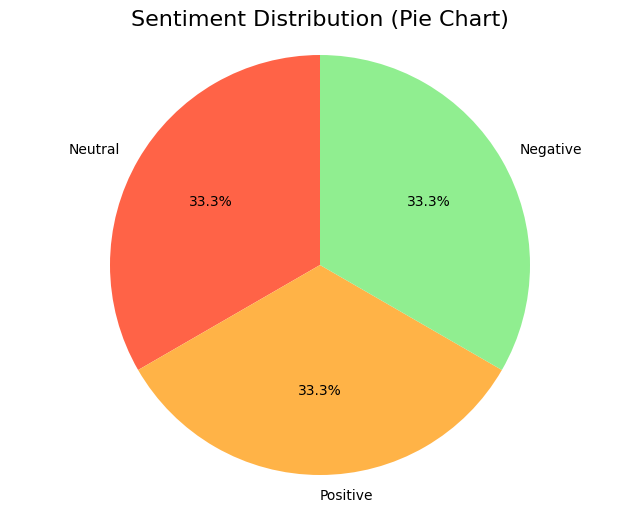

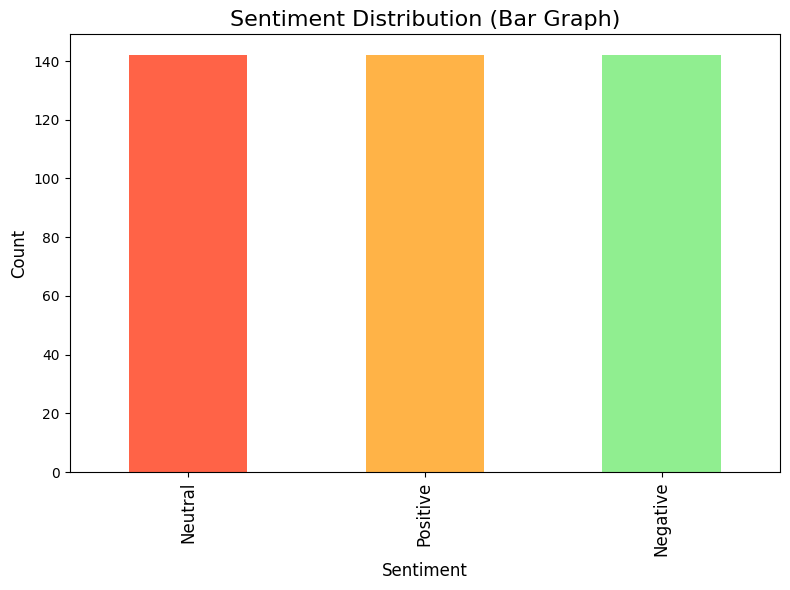

In [ ]:
# Sentiment Distribution Calculation
sentiment_counts = data['Label'].value_counts()

# Plotting Sentiment Distribution

# 1. Pie chart
sentiment_labels = {1: 'Positive', 0: 'Negative', 2: 'Neutral'}
sentiment_counts.index = sentiment_counts.index.map(sentiment_labels)

# Create Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FF6347', '#FFB347', '#90EE90'])
plt.title('Sentiment Distribution (Pie Chart)', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# 2. Bar Graph
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['#FF6347', '#FFB347', '#90EE90'])
plt.title('Sentiment Distribution (Bar Graph)', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
# Get the current tick positions and labels
ticks = plt.xticks()[0]  # Get the current tick positions
labels = sentiment_counts.index  # Your existing labels

# Set the xticks with both positions and labels
plt.xticks(ticks, labels, fontsize=12)  # or plt.xticks(ticks=ticks, labels=labels, fontsize=12) for clarity

plt.tight_layout()
plt.show()

***Understand Dataset***

In [ ]:
# Load the dataset

# Loads the dataset into memory for further analysis or preprocessing.
# pd.read_csv: A Pandas function that reads a CSV (Comma-Separated Values) file and converts it into a DataFrame.
# '/content/gujarati_sentiment_data_expanded_randomized.csv': The file path to the Gujarati sentiment dataset created earlier.
# Use : The CSV file contains the preprocessed Gujarati text and sentiment labels. This step is essential to make the data usable in the program.
df = pd.read_csv('/content/gujarati_sentiment_data_expanded_randomized.csv')

# Display the first few rows of the dataset
# Provides a quick preview of the dataset’s structure, including the column names and a few sample rows.
# df.head(): A Pandas function that returns the first 5 rows of the DataFrame (by default).
# print(): Displays the output of df.head() in the console.
# Use : To verify and ensures the dataset has been loaded correctly and matches expectations.
print(df.head())

                                                Text  Label
0  હું અગાઉ એક સાથીદાર સાથે વાત કરી રહ્યો હતો, અન...      2
1                             તમારું કામ શ્રેષ્ઠ છે.      1
2             મને નથી લાગતું કે તે પરીક્ષા પાસ કરશે.      0
3                   તમારું સ્મિત અને આનંદ અમૂલ્ય છે.      1
4                                આ સેતુ બહુ જૂનો છે.      2


In [ ]:
# To show the shape or dimension of dataset
df.shape

(426, 2)

In [ ]:
# Display basic information about the dataset

# Offers a quick overview of the dataset's structure and quality.
# The info() method in Pandas provides a concise summary of the DataFrame, including: The no. of rows and columns, Column names and their data types, The count of non-null (non-missing) values in each column and The memory usage of the DataFrame.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    426 non-null    object
 1   Label   426 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.8+ KB
None


In [ ]:
# Display descriptive statistics

# describe(): Generates descriptive statistics for the DataFrame.
# include='all': Ensures the statistics are calculated for all columns, regardless of their data type (numeric or non-numeric).
# For Numeric Columns (e.g., Label): Count: Total number of non-null rows, Mean: Average of the column values, Std: Standard deviation, Min/Max: Smallest and largest values and 25%, 50%, 75% (Quartiles): Values at those percentiles.
# For Non-Numeric Columns (e.g., Text): Count: Total number of non-null rows, Unique: Number of unique values, Top: The most frequent value (mode) and Freq: Frequency of the most frequent value.
print(df.describe(include='all'))

                                Text       Label
count                            426  426.000000
unique                           425         NaN
top     મને હવે તેના પર વિશ્વાસ નથી.         NaN
freq                               2         NaN
mean                             NaN    1.000000
std                              NaN    0.817457
min                              NaN    0.000000
25%                              NaN    0.000000
50%                              NaN    1.000000
75%                              NaN    2.000000
max                              NaN    2.000000


In [ ]:
# Summary of label distribution
print("Label Distribution:")

# Isolates the column containing the numeric labels (representing positive, negative, and neutral sentiments).
# Accesses the Label column in the DataFrame named data. ['Label']: Refers to the column by its name.
# value_counts(): A Pandas method that counts the occurrences of each unique value in the selected column.
# Use : Focuses on the target variable (Label) to analyze its distribution.
print(df['Label'].value_counts())

Label Distribution:
Label
2    142
1    142
0    142
Name: count, dtype: int64


In [ ]:
# Checking for missing values and ensuring data integrity

# Checks for missing values in the dataset.
# Use : isnull() identifies any missing or NaN values, and sum() counts how many missing values exist in each column. This helps in cleaning the data.
print("Missing values:\n", df.isnull().sum())

Missing values:
 Text     0
Label    0
dtype: int64


***Preprocessing :***

***Tokenization and Stopword Removal***

In [ ]:
# List of Stopwords

#     'અથવા', 'આ', 'તમે', 'હવે', 'કે', 'તે', 'જેથી', 'આપણે', 'સાથે', 'કોઈ', 'કિંબંધ', 'આપ', 'હો', 'એ',
#     'કેમ', 'હોવા', 'છે', 'શા', 'માં', 'અહિ', 'આમ', 'જોઇએ', 'થી', 'કેવા', 'જોઈએ', 'ફરી', 'હવે', 'અમે',
#     'આ', 'એક', 'છે', 'હું', 'છું', 'તમે', 'કર્યું', 'મને', 'કરીલું', 'જ',  'આમાંથી', 'ઘણી', 'મારે',
#     'પર', 'કોઈક', 'કંઈક', 'હતો', 'આને', 'કરી', 'કોઈ', 'તમારું', 'હતું', 'આવો'

In [ ]:
# A list of Gujarati stopwords (common words like "and", "the", etc)

# Stopwords are irrelevant for sentiment analysis or other NLP tasks, so removing them helps to reduce noise in the data.
gujarati_stopwords = [
    'આ', 'છે', 'અને', 'મા', 'ના', 'ને', 'થી', 'પર', 'વિશે', 'ના', 'સાથે', 'કિ', 'એ', 'તમારું', 'તમારા', 'તે', 'કરે', 'કરી',  'છે', 'માટે', 'માટે', 'ના', 'એ', 'પર', 'તે',
    'વાળા', 'આઠ', 'પણ', 'શું', 'કઈ', 'કે', 'જેમ', 'કેટલુ', 'કેટલી', 'કેવળ', 'આગળ', 'મારે', 'હવે', 'જ્યાં', 'કેવું', 'ક્યાં', 'આલટાની', 'ઘણો', 'વધુ', 'ઓછો', 'મોટું', 'ક્યારે',
    'કારણ', 'અન્ય', 'છ', 'છતાં', 'તટસ્થથ', 'કરવું', 'રહેશે', 'એવી', 'પછી', 'તેવા', 'માટે', 'કેવું', 'જ્યાં', 'નવું', 'પરિસ્થિથિતિ', 'વચ્ચે', 'ની', 'જોવા', 'તે', 'એક', 'જેવી', 'કે'
]

# A basic rule-based Gujarati stemmer (simplified)

# A simple rule-based stemmer that removes common suffixes from Gujarati words to get the root form.
# Use : Stemming reduces words to their base form (e.g., "કરતું" -> "કર"), which helps in improving the performance of models by focusing on the root of words.
def gujarati_stem(word):
    suffixes = ['ો', 'ઓ', 'તા', 'તી', 'એ', 'માં', 'નો', 'ની', 'ને', 'વા', 'વું', 'તા']
    for suffix in suffixes:
        if word.endswith(suffix):
            word = word[:-len(suffix)]
            break
    return word

# A simple rule-based lemmatizer for Gujarati verbs

# A rule-based lemmatizer that transforms Gujarati verbs to their base or infinitive form (e.g., "કરતું" -> "કરવું"), to ensure uniformity across variations of the same word, which improves text analysis consistency.
def gujarati_lemmatize(word):
    verb_endings = ['તા', 'તી', 'વું', 'વાનો', 'વાની']
    for ending in verb_endings:
        if word.endswith(ending):
            word = word[:-len(ending)] + "વું"  # Take the base verb form for infinitive
            break
    return word

# Function to clean and preprocess text (remove stopwords, punctuation, stemming, lemmatization)

# which helps improve model performance in NLP tasks.
def preprocess_text(text):

    # Tokenize text (split into words)
    words = word_tokenize(text)

    # Remove punctuation
    words = [word for word in words if word not in string.punctuation]

    # Remove stopwords
    words = [word for word in words if word not in gujarati_stopwords]

    # Apply stemming
    words = [gujarati_stem(word) for word in words]

    # Apply lemmatization
    words = [gujarati_lemmatize(word) for word in words]

    # Join words back into a sentence
    return ' '.join(words)


# Apply preprocessing to the text data (remove stopwords, apply stemming and lemmatization)
df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

# Preview the cleaned data
print(df[['Text', 'Cleaned_Text']].head())

# # Load the dataset

# # utf-8-sig encoding to handle special characters properly, especially in Gujarati text.
# data = pd.read_csv("gujarati_sentiment_data_expanded_randomized.csv", encoding="utf-8-sig")

# # Apply preprocessing to the text data (remove stopwords, apply stemming and lemmatization)
# data['Cleaned_Text'] = data['Text'].apply(preprocess_text)

# # Preview the cleaned data
# print(data[['Text', 'Cleaned_Text']].head())

# # Save the cleaned dataset to a new CSV for further analysis
# data.to_csv("gujarati_sentiment_data_cleaned.csv", index=False, encoding="utf-8-sig")

# print("\n Apply preprocessing to training and testing sets")

# # Apply preprocessing to training and testing sets
# X_train = X_train.apply(preprocess_text)
# X_test = X_test.apply(preprocess_text)

# # Preview of the cleaned text
# print("Training :\n", X_train)

                                                Text  \
0  હું અગાઉ એક સાથીદાર સાથે વાત કરી રહ્યો હતો, અન...   
1                             તમારું કામ શ્રેષ્ઠ છે.   
2             મને નથી લાગતું કે તે પરીક્ષા પાસ કરશે.   
3                   તમારું સ્મિત અને આનંદ અમૂલ્ય છે.   
4                                આ સેતુ બહુ જૂનો છે.   

                                        Cleaned_Text  
0  હું અગાઉ સાથીદાર વાત રહ્ય હત અમે બં સંમત થયા વ...  
1                                        કામ શ્રેષ્ઠ  
2                      મ નથી લાગતું પરીક્ષા પાસ કરશે  
3                                  સ્મિત આનંદ અમૂલ્ય  
4                                       સેતુ બહુ જૂન  


***Split Dataset into Train and Test***

In [ ]:
# Splitting data into training and testing sets (80% train, 20% test)

# Assigns the 'Text' column of the DataFrame to the variable X (input features).
# Use : This selects the text data (features) from the dataset, which will be used for model training.
X = df['Cleaned_Text']

# Assigns the 'Label' column of the DataFrame to the variable y (target labels).
# Use : This selects the sentiment labels (targets) that correspond to each text entry in the dataset.
y = df['Label']

# train_test_split() is used to create a split between the training and testing datasets, ensuring that the model can be trained on one subset and evaluated on another. The random_state=42 ensures reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Preview of train/test split

# Prints the number of samples in the training set, to ensure that the split is correct (80% of the original data).
print(f"\nTraining size: {len(X_train)}")

# Prints the number of samples in the test set, to ensure that the split is correct (20% of the original data).
print(f"Test size: {len(X_test)}")


# Save the cleaned dataset to a new CSV for further analysis
df.to_csv("gujarati_sentiment_data_cleaned.csv", index=False, encoding="utf-8-sig")

# Preview of the cleaned text
print("\nTraining :\n", X_train)


Training size: 340
Test size: 86

Training :
 66                        મ એકલા મુસાફરી કરવા મજા નથી આવ
132    હું શાંતિ સંતોષ ભાવનાથી ભરપૂર છું જાણી હું માર...
222             નિશ્ચય કારણે તમે દરેક લક્ષ્ય પ્રાપ્ત કરશ
31                         મારી પાસે પ્રવાસ પૂર પૈસા નથી
84                                     હાસ્ય આનંદ અમૂલ્ય
                             ...                        
71                      હું ચુપચાપ જવાનું વિચારી રહ્ય હત
106    સૂર્ય ચમકે હ તાજી લાગે મારી આસપાસ દરેક વસ્તુ જ...
270    આજે હું કોઈપણ નકારાત્મકવું છોડી દેવાનું પસંદ ક...
348                                           આજે રવિવાર
102                                 હું અહીં મળ આવ્ય છું
Name: Cleaned_Text, Length: 340, dtype: object


***Feature Extraction***

In [ ]:
# TF-IDF Vectorization

# The TfidfVectorizer converts text data into numerical features using Term Frequency-Inverse Document Frequency (TF-IDF).
# max_features=5000: Limits the number of features (words) to the top 5000 based on their importance (TF-IDF score).
# ngram_range=(1, 2): Uses both unigrams (single words) and bigrams (two consecutive words) as features.
# sublinear_tf=True: Applies a logarithmic scaling to the term frequency, making it less sensitive to very frequent words.
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), sublinear_tf=True)  # Limit to 5000 features for simplicity and Unigrams + Bigrams

# fit_transform() learns the vocabulary and idf (inverse document frequency) values from the training set and then transforms the X_train text data into a sparse matrix of TF-IDF features, which can be used for model training.
X_train_tfidf = vectorizer.fit_transform(X_train)

# transform() applies the same transformation (based on the training data's vocabulary) to the test data, ensuring that both training and test data are represented in the same feature space.
X_test_tfidf = vectorizer.transform(X_test)

# Checking the shape of the resulting matrices

# To check the number of samples and features in the training data after the vectorization process. The output is typically in the form (number_of_samples, number_of_features).
print(f"Training data shape: {X_train_tfidf.shape}")

# To check the number of samples and features in the testing data after the vectorization process. The output is typically in the form (number_of_samples, number_of_features).
print(f"Testing data shape: {X_test_tfidf.shape}")

Training data shape: (340, 1164)
Testing data shape: (86, 1164)


***Model : SVM + Random Forest + Logistic Regression***


1. **TF-IDF Vectorization:** Converts Gujarati text into a numerical representation suitable for machine learning.

2. **Individual Models :**
*  SVM: Handles high-dimensional sparse TF-IDF features well.
*  Random Forest: Captures non-linear relationships.
*  Logistic Regression: A fast and effective linear baseline.

3. **Voting Classifier :**
*  Combines predictions from all three models.
*  Soft Voting aggregates probabilities from all models for final predictions.








In [ ]:
# Define individual models
svm_model = SVC(kernel="linear", probability=True, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Combine models using Voting Classifier
voting_model = VotingClassifier(
    estimators=[
        ("svm", svm_model),
        ("random_forest", rf_model),
        ("logistic_regression", lr_model)
    ],
    voting="soft"  # Use "soft" voting to combine probabilities
)

***Train and Evaluate the Ensemble Model***

Ensemble Model (SVM + Random Forest + Logistic Regression):
Accuracy: 81.40%

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        22
           1       0.80      0.89      0.85        37
           2       0.86      0.70      0.78        27

    accuracy                           0.81        86
   macro avg       0.82      0.80      0.81        86
weighted avg       0.82      0.81      0.81        86



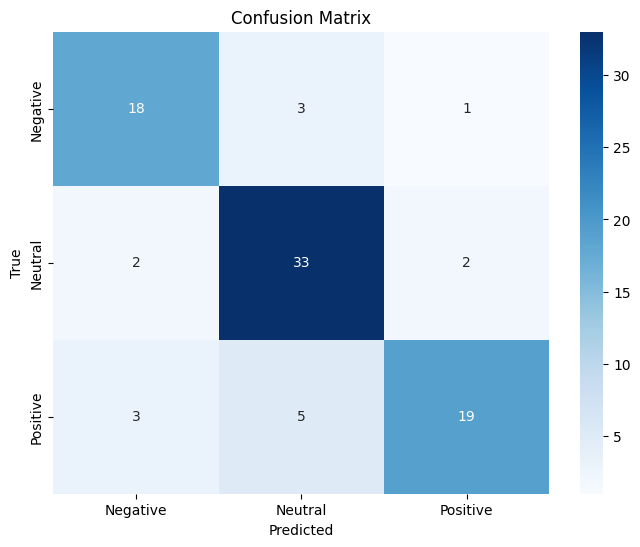

In [ ]:
# Train the Voting Classifier
voting_model.fit(X_train_tfidf, y_train)

# Test the Voting Classifier
predictions = voting_model.predict(X_test_tfidf)

# Display results
print("Ensemble Model (SVM + Random Forest + Logistic Regression):")
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, predictions))


# Confusion Matrix visualization

# The confusion matrix provides a detailed breakdown of correct and incorrect predictions for each class. It helps in understanding how well the model performs and where it makes mistakes.
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))

# sns.heatmap() visualizes the confusion matrix as a color-coded matrix,
# with annotations (annot=True) showing the counts of predictions. The xticklabels and yticklabels are set to match the sentiment classes, and fmt="d" ensures the values are displayed as integers.
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

***Wordcloud for Gujarati Text***

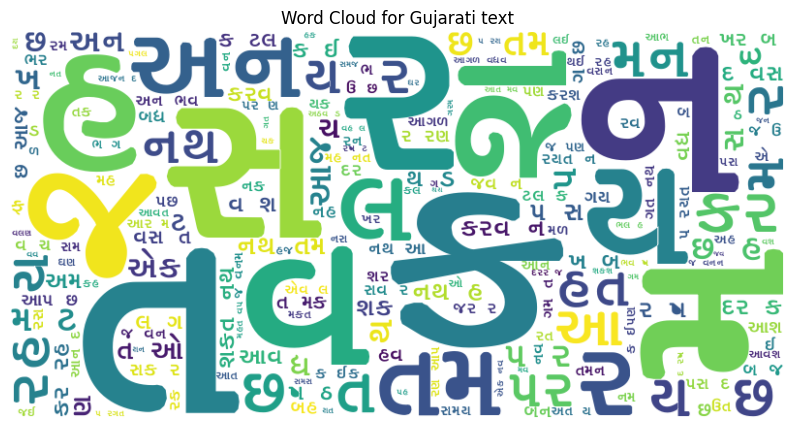

In [ ]:
# Wordcloud for Gujarati text before text processing
dataframe_gujarati = pd.read_csv("/content/gujarati_sentiment_data_expanded_randomized.csv")
gujarati_text = ' '.join(dataframe_gujarati['Text'])
wordcloud_gujarati = WordCloud(width=800, height=400, background_color='white', font_path='/content/Aakar.ttf').generate(gujarati_text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_gujarati, interpolation='bilinear')
plt.title('Word Cloud for Gujarati text')
plt.axis('off')
plt.show()

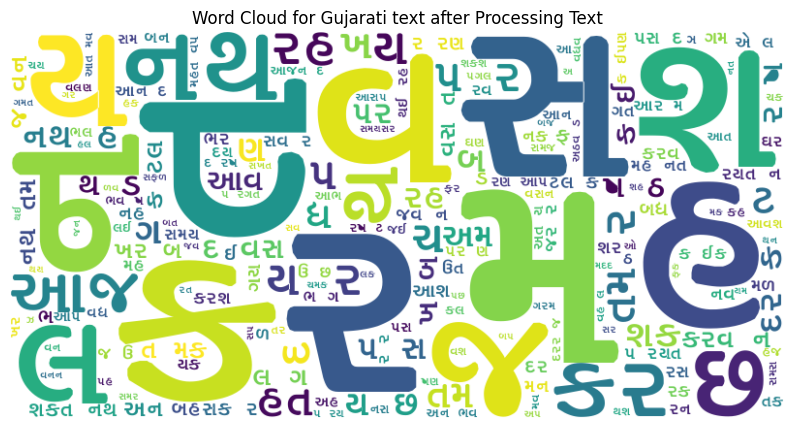

In [ ]:
# Wordcloud for Gujarati text after text processing
dataframe_gujarati = pd.read_csv("/content/gujarati_sentiment_data_cleaned.csv")
gujarati_text = ' '.join(dataframe_gujarati['Cleaned_Text'])
wordcloud_gujarati = WordCloud(width=800, height=400, background_color='white', font_path='/content/Aakar.ttf').generate(gujarati_text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_gujarati, interpolation='bilinear')
plt.title('Word Cloud for Gujarati text after Processing Text')
plt.axis('off')
plt.show()

In [ ]:
# Function to test the trained ensemble model and display predictions with confidence levels
def test_model(new_texts):
    # Transform the new text inputs using the same TF-IDF vectorizer
    new_texts_tfidf = vectorizer.transform(new_texts)

    # Predict sentiment using the trained voting model
    predictions = voting_model.predict(new_texts_tfidf)

    # Get the predicted probabilities for each class
    predicted_probs = voting_model.predict_proba(new_texts_tfidf)

    # Map numeric predictions back to sentiment labels
    sentiment_mapping = {1: "સકારાત્મક", 2: "તટસ્થ", 0: "નકારાત્મક"}
    predicted_labels = [sentiment_mapping[pred] for pred in predictions]

    # Print the predictions with confidence levels
    for text, label, probs in zip(new_texts, predicted_labels, predicted_probs):
        # Get the confidence level for the predicted label
        confidence = max(probs) * 100  # Confidence is the highest probability for the predicted class
        print(f"મૂળ વાક્ય: {text}")
        print(f"અનુમાનિત વાક્ય: {label}")
        print(f"વિશ્વસનીયતા: {confidence:.2f}%")
        print("-" * 40)

# Example new Gujarati text inputs
new_texts = [
    "જ્યારે મૂવીમાં થોડીક ખામીઓ હતી, તેમ છતાં તે ત્યાંની મોટા ભાગની ફિલ્મોની તુલનામાં શ્રેષ્ઠ કૃતિ હતી.",
    "આ એક સારી વાત છે.",
    "હું વિશ્વાસ કરી શકતો નથી કે આ નવું ઉત્પાદન કેટલું 'અદ્ભુત' છે, તે ચોક્કસપણે મારી અપેક્ષા મુજબ નથી.",
    "આજે હવામાન ન તો ખૂબ ગરમ છે કે ન તો ખૂબ ઠંડુ, બસ... સંપૂર્ણ સરેરાશ."
]

# Test the model
test_model(new_texts)

મૂળ વાક્ય: જ્યારે મૂવીમાં થોડીક ખામીઓ હતી, તેમ છતાં તે ત્યાંની મોટા ભાગની ફિલ્મોની તુલનામાં શ્રેષ્ઠ કૃતિ હતી.
અનુમાનિત વાક્ય: તટસ્થ
વિશ્વસનીયતા: 75.44%
----------------------------------------
મૂળ વાક્ય: આ એક સારી વાત છે.
અનુમાનિત વાક્ય: તટસ્થ
વિશ્વસનીયતા: 53.36%
----------------------------------------
મૂળ વાક્ય: હું વિશ્વાસ કરી શકતો નથી કે આ નવું ઉત્પાદન કેટલું 'અદ્ભુત' છે, તે ચોક્કસપણે મારી અપેક્ષા મુજબ નથી.
અનુમાનિત વાક્ય: નકારાત્મક
વિશ્વસનીયતા: 79.70%
----------------------------------------
મૂળ વાક્ય: આજે હવામાન ન તો ખૂબ ગરમ છે કે ન તો ખૂબ ઠંડુ, બસ... સંપૂર્ણ સરેરાશ.
અનુમાનિત વાક્ય: તટસ્થ
વિશ્વસનીયતા: 82.83%
----------------------------------------


***Save the trained model for further use***

In [ ]:
# Saving the model and vectorizer

# Saves the trained Logistic Regression model to a file
joblib.dump(voting_model, 'gujarati_sentiment_model.pkl')

# Saves the TF-IDF vectorizer to a file
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("Model and vectorizer saved successfully.")

Model and vectorizer saved successfully.
